# Reference: 

[1] Robotics Codes from Scratch: https://rcfs.ch/ \
[2] https://tube.switch.ch/channels/e5e11e14?order=oldest


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

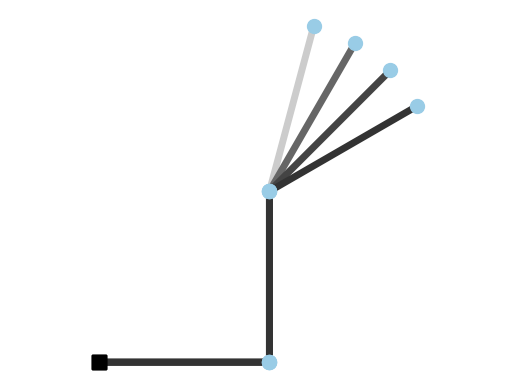

In [6]:
# Manipulator class
manipulator = lambda: None
manipulator.nbDOFs = 3
manipulator.l = [2.0, 2.0, 2.0]  # l1, l2, l3
manipulator.x = [0, np.pi / 2, -np.pi / 12]  # x1, x2, x3


def plot_forward_kinematics(fk, iteration=1):
    """Plot forward kinematics for all joints (in robot coordinate system)"""
    plt.plot(
        fk[0, :],
        fk[1, :],
        color=(0.8 * (1 / iteration), 0.8 * (1 / iteration), 0.8 * (1 / iteration)),
        linewidth=5,
        zorder=0,
    )
    plt.scatter(
        fk[0, 1:], fk[1, 1:], color=(0.6, 0.8, 0.9), marker="o", s=100, zorder=1
    )
    plt.scatter(fk[0, 0], fk[1, 0], color=(0.0, 0.0, 0.0), marker="s", s=100, zorder=1)


def compute_forward_kinematics(params: manipulator) -> None:
    """Compute forward kinematics for all joints (in robot coordinate system)"""

    L = np.tril(np.ones(params.nbDOFs))
    f = np.vstack(
        [
            L @ np.diag(params.l) @ np.cos(L @ params.x),
            L @ np.diag(params.l) @ np.sin(L @ params.x),
        ]
    )
    f = np.hstack((np.zeros((2, 1)), f))
    return f


# Default configuration @ x3 as -pi/12
fk0 = compute_forward_kinematics(manipulator)
plot_forward_kinematics(fk0, iteration=1)

# Next target @ x3 as -pi/6
manipulator.x[-1] = -np.pi / 6
fk1 = compute_forward_kinematics(manipulator)
plot_forward_kinematics(fk1, iteration=2)

# Next target @ x3 as -pi/4
manipulator.x[-1] = -np.pi / 4
fk2 = compute_forward_kinematics(manipulator)
plot_forward_kinematics(fk2, iteration=3)

# Next target @ x3 as -pi/3
manipulator.x[-1] = -np.pi / 3
fk3 = compute_forward_kinematics(manipulator)
plot_forward_kinematics(fk3, iteration=4)

plt.axis("off")
plt.axis("equal")
plt.show()